<a href="https://colab.research.google.com/github/kislay960/Data-Science-Practice/blob/main/ImgAug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install imgaug

In [2]:
from imgaug import augmenters as iaa

In [3]:
from keras.preprocessing import image
import matplotlib.pyplot as plt

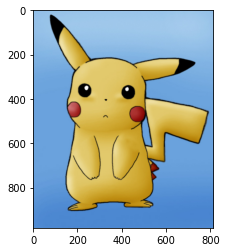

In [4]:
img1 = image.load_img('/content/drive/MyDrive/Images train pokemon/296.jpg')
plt.imshow(img1)
plt.show()

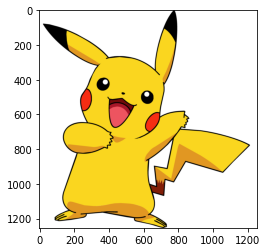

In [5]:
img2 = image.load_img('/content/drive/MyDrive/Images train pokemon/297.jpg')
plt.imshow(img2)
plt.show()

In [26]:
seq = iaa.Sequential([
    iaa.Crop(px=(0, 16)), # crop images from each side by 0 to 16px (randomly chosen)
    iaa.Fliplr(0.5), # horizontally flip 50% of the images
    #iaa.GaussianBlur(sigma=(0, 3.0)), # blur images with a sigma of 0 to 3.0
    iaa.LinearContrast((0.5, 2.0), per_channel=0.5),
    iaa.Affine(
            scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
            translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)},
            rotate=(-45, 45),
            shear=(-16, 16),
            order=[0, 1],
            cval=(0, 255)
        )
])

In [8]:
import numpy as np

In [13]:
img1 = image.img_to_array(img1)/255.0
img2 = image.img_to_array(img2)/255.0

In [14]:
batch = img1.reshape((1,*img1.shape))
batch.shape

(1, 982, 814, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


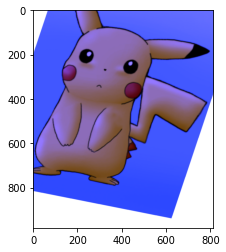

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


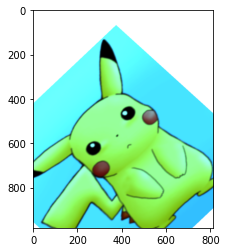

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


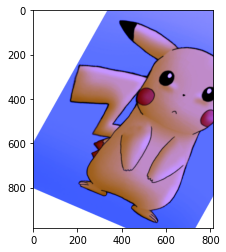

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


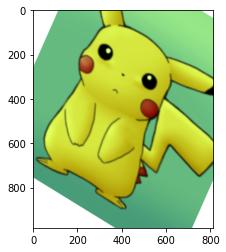

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


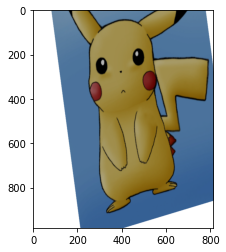

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


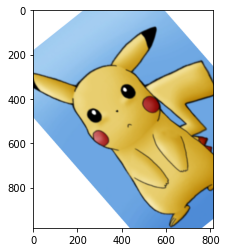

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


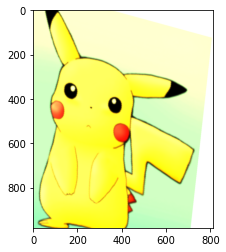

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


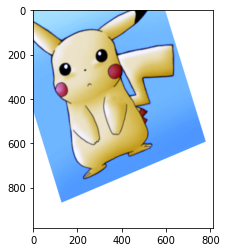

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


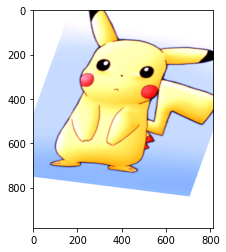

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


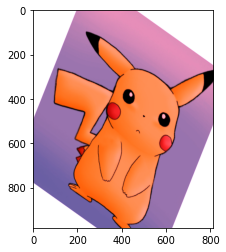

In [19]:
for i in range(10):
    output = seq(images=batch)
    plt.imshow(output[0])
    plt.show()

In [21]:
from pathlib import Path
import os

In [22]:
p = Path('/content/drive/My Drive/Images train pokemon')

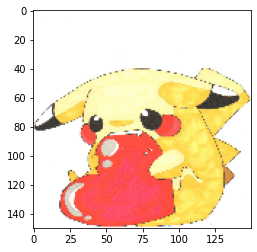

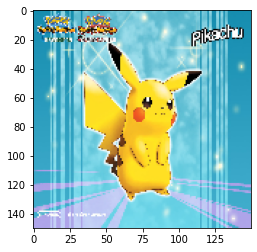

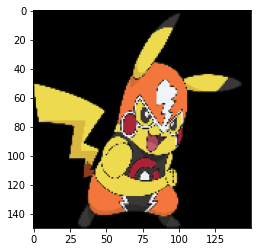

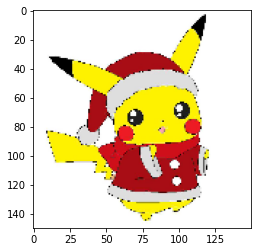

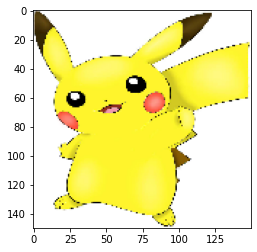

In [29]:
images = []
count=0
dirs = p.glob('*.jpg')
labels_dict = {'Pikachu':0, 'Bulbasaur':1, 'Charmender':2}
for d in dirs:
    img = image.load_img(d,target_size=(150,150))
    img_array = image.img_to_array(img,dtype='uint8')
    img_array = img_array/255.0
    batch = img_array.reshape((1,*img_array.shape))
    output = seq(images=batch)
    plt.imshow(img)
    plt.show()
    count+=1
    if count==5:
        break

In [30]:
from keras.models import Sequential
from keras.layers import *

In [34]:
model = Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(GlobalAveragePooling2D())
model.add(Dense(64,activation='relu'))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 64)       

In [35]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [44]:
from keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(rescale=1.0/255,
                               rotation_range=20,
                               width_shift_range=0.2,
                               height_shift_range=0.2,
                               horizontal_flip=True)
train_generator = train_gen.flow_from_directory(
    "/content/drive/MyDrive/images/",
    target_size = (150,150),
    batch_size = 32,
    class_mode='categorical'
    )

Found 808 images belonging to 4 classes.


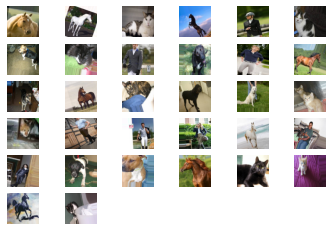

In [45]:
for x,y in train_generator:
    #print(x.shape)
    #x = seq(images=x)
    for i in range(32):
        plt.subplot(6,6,i+1)
        plt.imshow(x[i])
        plt.axis('off')
    plt.show()
    break

now train the model
